In [216]:
%run NaiveBayes.ipynb

from tabulate import tabulate

In [217]:
# load a dataset with missing values
df = preprocess("hypothyroid.csv")

# NB class - laplace

## Initialisation

In [295]:
%run NaiveBayes.ipynb

snb = SimpleNB()

## Training

In [299]:
%run NaiveBayes.ipynb

snb = SimpleNB("epsilon", 1e-12)
for i in range(9):
    df = preprocess(data_files[i])
    snb.fit(df.iloc[:, :-1], df.iloc[:, -1])
    print(snb.score())

0.9910913140311679
0.7552447552447581
0.8738425925926082
0.5057705363204311
0.8516129032258077
0.9522605121720574
0.9971688823241416
0.90308641975286
0.6047197640117992


## Prediction

In [365]:
%run NaiveBayes.ipynb

snbs = [SimpleNB(i) for i in [0.0001, 0.001, 0.01, 0.1, 1]] +\
        [SimpleNB("epsilon", epsilon=(1e-2)**i) for i in range(5)]

all_acc = []
for snb in snbs:
    acc_sco = AccuracyScorer()
    print("========================================")
    print(snb._hyper_params)
    print("------------------------------------")
    kfc = KFoldValidation(snb, acc_sco,  k=10)
    
    model_acc =[]
    for i in range(9):
        X, y = preprocess(data_files[i], split=True)
        accs = kfc.fit_transform(X, y)
        avg = np.average(accs)
        # print(accs)
        print(avg)
        model_acc.append(avg)
    all_acc.append(model_acc)

print(list(zip(*all_acc)))

{'_smoothing': 0.0001, '_epsilon': 1e-06}
------------------------------------
0.9911111111111095
0.7241379310344825
0.861271676300581
0.4999999999999994
0.85625
0.9523659305993648
0.9966789667896588
0.9030864197530611
0.5294117647058825
{'_smoothing': 0.001, '_epsilon': 1e-06}
------------------------------------
0.9911111111111095
0.7241379310344825
0.861271676300581
0.4999999999999994
0.85625
0.9523659305993648
0.9943419434194251
0.9030864197530611
0.5294117647058825
{'_smoothing': 0.01, '_epsilon': 1e-06}
------------------------------------
0.9899999999999984
0.7241379310344825
0.861271676300581
0.4999999999999994
0.85625
0.9523659305993648
0.9912669126691176
0.9030864197530611
0.5294117647058825
{'_smoothing': 0.1, '_epsilon': 1e-06}
------------------------------------
0.9777777777777763
0.7241379310344825
0.861271676300581
0.4999999999999994
0.85625
0.9523659305993648
0.9861008610086011
0.9031635802468884
0.5323529411764707
{'_smoothing': 1, '_epsilon': 1e-06}
-----------------

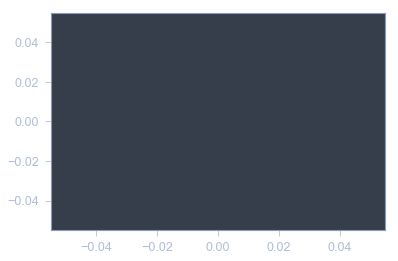

In [375]:
import matplotlib.pyplot as plt

plt.plot(all_acc)
plt.show()

## Entropy

In [383]:
%run NaiveBayes.ipynb

snbs = [SimpleNB(i) for i in [0.0001, 0.001, 0.01, 0.1, 1]] +\
        [SimpleNB("epsilon", epsilon=(1e-2)**i) for i in range(5)]

all_acc = []

acc_sco = AccuracyScorer()

for snb in snbs:
    tts = TrainTestSplit(ratio=0.1)
    
    acc_sco = AccuracyScorer()
    print("========================================")
    print(snb._hyper_params)
    print("------------------------------------")
    
    model_acc =[]
    for i in range(9):
        X, y = preprocess(data_files[i], split=True)
        
        kfc = KFoldValidation(snb, acc_sco)
        accs = kfc.fit_transform(X, y)
        
        X_train, X_test, y_train, y_test = tts.fit_transform(X, y)
        snb.fit(X_train, y_train)
        
        class_gains = snb.class_information_gains
        
#         for col in X:
#             print(X[col].value_counts())
        print(snb.score(), np.average(accs))

        
        for i, name in enumerate(X.columns):
            gain = class_gains[i]
#             print(f'{"InformationGain(label,"+name+")":<40} = {gain}')

        print("--------------------")

        attrib_gains = snb.attribute_information_gains
        
        for i, name in enumerate(X.columns):
            gain = attrib_gains[i]
#             print(f'{"InformationGain("+name+",label)":<40} = {gain}')

{'_smoothing': 0.0001, '_epsilon': 1e-06}
------------------------------------
0.9888613861386146 0.9911111111111095
--------------------
0.7509727626459122 0.7241379310344825
--------------------
0.861093247588399 0.861271676300581
--------------------
0.5124528301886727 0.4999999999999994
--------------------
0.8776978417266169 0.85625
--------------------
0.9525650035137473 0.9523659305993648
--------------------
0.9960333743675096 0.9966789667896588
--------------------
0.9054355281206355 0.9030864197530611
--------------------
0.5540983606557377 0.5294117647058825
--------------------
{'_smoothing': 0.001, '_epsilon': 1e-06}
------------------------------------
0.9876237623762384 0.9911111111111095
--------------------
0.7509727626459122 0.7241379310344825
--------------------
0.861093247588399 0.861271676300581
--------------------
0.5124528301886727 0.4999999999999994
--------------------
0.8776978417266169 0.85625
--------------------
0.9525650035137473 0.9523659305993648
-----

## Preprocessing

In [22]:
df = preprocess(data_files[3])

In [105]:
if __name__ == "__main__":
    for data_file in data_files:
        preprocess(data_file)

In [368]:
snb.__dict__

{'_smoothing': 'epsilon',
 '_prior': {'N': 0.06677018633540373,
  'M': 0.018633540372670808,
  'D': 0.04192546583850932,
  'V': 0.06832298136645963,
  'R': 0.08695652173913043,
  'B': 0.06055900621118013,
  'A': 0.2391304347826087,
  'C': 0.027950310559006212,
  'G': 0.04192546583850932,
  'E': 0.11956521739130435,
  'H': 0.017080745341614908,
  'L': 0.04813664596273292,
  'K': 0.08695652173913043,
  'Q': 0.031055900621118012,
  'S': 0.017080745341614908,
  'F': 0.003105590062111801,
  'J': 0.006211180124223602,
  'O': 0.006211180124223602,
  'T': 0.006211180124223602,
  'U': 0.003105590062111801,
  'P': 0.003105590062111801},
 '_conditional': defaultdict(__main__.dd_special,
             {0: defaultdict(__main__.dd_float,
                          {'N': defaultdict(float,
                                       {1.0: 0.18604651162790697,
                                        2.0: 0.5581395348837209,
                                        3.0: 0.2558139534883721}),
                  